In [26]:
import re
import random
import numpy as np
from string import ascii_uppercase


In [27]:
def create_board(m=10,n=10):
    """ returns an numpy array of size m*n filled with Zero values"""
    return np.zeros((m,n))
def position_ships(ships_code,ships_size, m=10,n=10):
    """
    Returns a list of positions values in the form of letter and number 
    based on the ship sizes in dictionary ships_size
    """
    ships_pos_dic = {} #Dictionary holding position for each list

    pc_board = create_board()
    for iship,isize  in ships_size.items():
        ships_pos_dic[iship] = []
        flagOkposition=True
        while flagOkposition:
            positionx = random.choice(range(0,n))
            positiony = random.choice(range(0,m))
            angleship = random.choice(("v","h"))
            #print(f"first poistion of ship x{positionx}, y{positiony} and lays {angleship}")
            if angleship == "v":
                if (positiony + isize) >=m :
                    print("try another starting position")
                else:
                    #print(positiony + isize)
                    overlapflag= False
                    for ishipy in range(positiony,positiony+isize):
                        if pc_board[ishipy,positionx] > 0:
                            print("Overlapping of ships. Trying another position")
                            overlapflag = True
                    if overlapflag:
                        flagOkposition = True
                    else:    
                        pc_board[positiony:(positiony+isize),positionx] = ships_code[iship]
                        for ipos in range(positiony,positiony+isize):
                            list_ship_pos = ships_pos_dic[iship] 
                            list_ship_pos.append(ascii_uppercase[ipos]+str(positionx+1))
                        flagOkposition = False
            else:
                if (positionx + isize) >=n or positiony >=m:
                    print("try another starting position")
                else:
                    overlapflag= False
                    for ishipx in range(positionx,positionx+isize):
                        if pc_board[positiony,ishipx] > 0:
                            print("Overlapping of ships. Trying another position")
                            overlapflag = True
                    if overlapflag:
                        flagOkposition = True
                    else:
                    #print(positionx+isize)
                        pc_board[positiony,positionx:(positionx+isize)] = ships_code[iship]
                        for ipos in range(positionx,positionx+isize):
                            list_ship_pos = ships_pos_dic[iship] 
                            list_ship_pos.append(ascii_uppercase[positiony+1]+str(ipos+1))
                        flagOkposition = False
    #print(pc_board)
    print(ships_pos_dic)
    list_final_pos = []
    for positionlist in ships_pos_dic.values():
        list_final_pos.extend(positionlist)
    return pc_board,ships_pos_dic, list_final_pos
# Function with a starting number of guesses (ex: 65):
# For each guess: decrementing by 1 at each guesses.
# While not all ships sunk and number of guesses >= 1, ask this

# This function checks that the case entered is correct
def guess():
    # Asking player to enter a letter 
    letter_lin = str(input("Enter a line between A and J: "))
    letter_lin = letter_lin.upper()
    
    # Checking if letter is within range of the board with while loop and using a boolean and not stopping until condition is met
    pattern = "[ABCDEFGHIJ]"
    
    while (bool(re.search(pattern, letter_lin)) is False) :
        letter_lin = str(input("An incorrect character or out of range letter was entered.\n Please enter a column between A and J: "))
        letter_lin = letter_lin.upper()

    # Checking if multiple characters are not entered and not stopping until condition is met
    while len(letter_lin) != 1:
        letter_lin = str(input("You entered more than 1 character.\n Please enter a column between A and J: "))
        letter_lin = letter_lin.upper()

    # Asking player to enter a letter 
    column_num = int(input("Enter a number between 1 and 10: "))
    
    # Checking if number is within range and keep asking until in range
    while not 1<=column_num<=10 :
        column_num = int(input("An incorrect character or out of range letter was entered.\n Please enter a column between 1 and 10: "))    

    # Transforming the number into string
    str_column_num = str(column_num)
    
    # Joining the strings to have the identity of the case (ex: B7)
    case = letter_lin+str_column_num
    return case

#%% BLOCK FOR VISUALIZATION
import matplotlib.pyplot as plt
from matplotlib import colors
def transform_case(case):
    y = ord(case[0].lower()) - 96 - 1 #to ascii #-1 for numpy congruency
    x = int(case[1]) - 1#to ascii #-1 for numpy congruency
    return y,x #For numpy array

def visu_board(already_guessed, list_hits, m, n):
    """
    Touch = X 
    MISSED = o

    dic values :
        
    """
    cmap = colors.ListedColormap(['navy', 'grey','red'])
    bounds=[0,1,2,4]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    game_board = create_board()
    for case in already_guessed:
        iy, ix = transform_case(case)
        if case in list_hits:
            game_board[iy,ix] = 2
        else:
            game_board[iy,ix] = 1
    #FIGURE 
    fig, ax = plt.subplots(1,1,figsize= (5,5))
    ax.imshow(game_board,interpolation='nearest', origin='upper',
                    cmap=cmap, norm=norm)
    #ax.set_xlim(0,10)
    ax.set_xticks(np.arange(0,n))
    ax.set_yticks(np.arange(0,m))
    minor_ticks = np.arange(0.5, m+0.5)
    ax.set_yticks(minor_ticks, minor=True)
    ax.set_xticks(minor_ticks, minor=True)

    ax.grid(color="k", which='minor', alpha=1, linewidth=2)
    ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10])
    ax.set_yticklabels(["A","B","C","D","E","F","G","H","I","J"])
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
    ax.set_xlim(-0.5,n-0.5)
    return ax

In [28]:
#INITIALIZATION OF GAME
#Defined size of board (rows m , colums n)
m = 10; n = 10

#Defined length of ships
ships_size={"carrier":5,
"battleship":4,
"cruiser":3,
"submarine":3,
"destroyer": 2}

#Defined code of ships
ships_code={"carrier":1,
"battleship":2,
"cruiser":3,
"submarine":4,
"destroyer": 5}
#Maximum number of guesses
number_guess = 10


Overlapping of ships. Trying another position
try another starting position
try another starting position
{'carrier': ['C7', 'D7', 'E7', 'F7', 'G7'], 'battleship': ['A9', 'B9', 'C9', 'D9'], 'cruiser': ['A2', 'B2', 'C2'], 'submarine': ['B3', 'C3', 'D3'], 'destroyer': ['E4', 'F4']}
TOUCHED


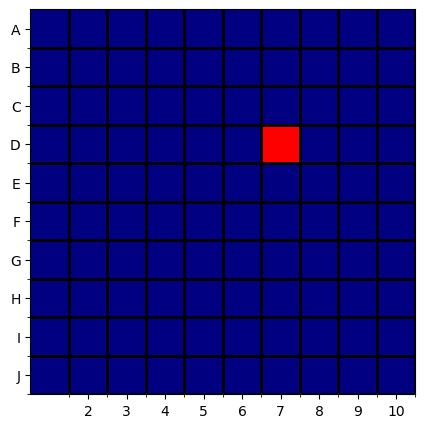

TOUCHED


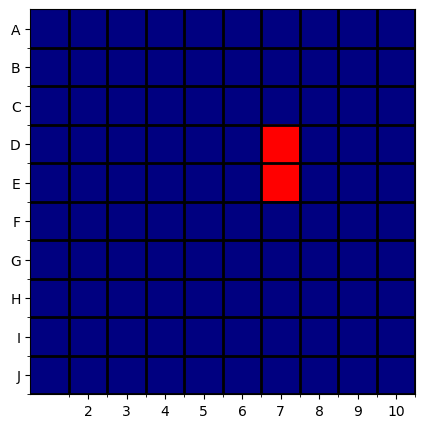

MISSED


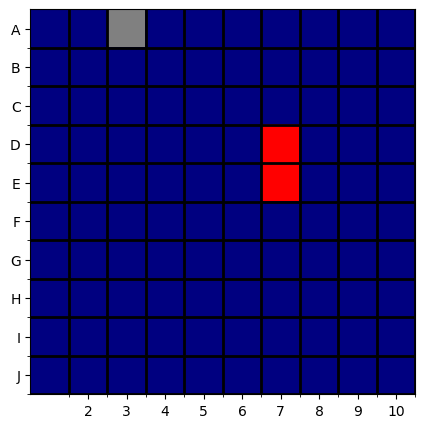

TOUCHED


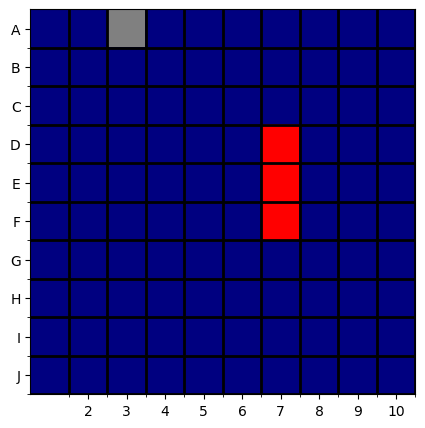

TOUCHED


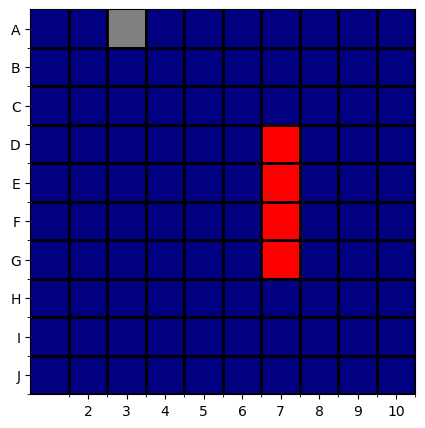

TOUCHED


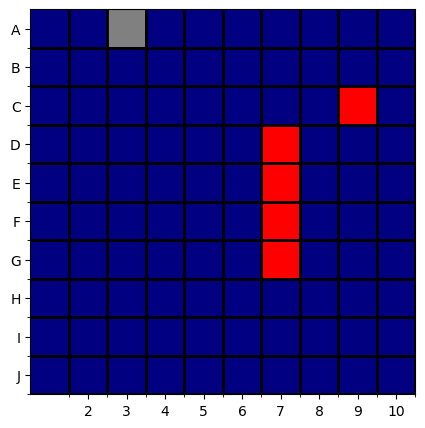

MISSED


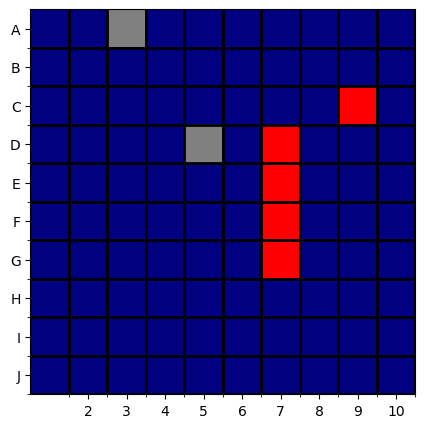

MISSED


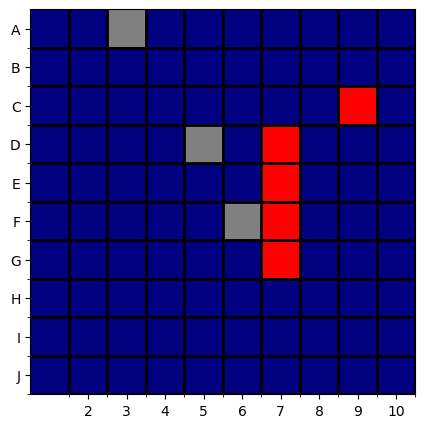

YOU LOSE
GAME OVER


In [30]:
pc_board,ships_pos_dic, list_final_pos = position_ships(ships_code,ships_size)
already_guessed=[]
list_hits = []
shipsunk = 0
flag = True

while flag: #number_guess>0:
    flagcase= True
    while flagcase:
        case = guess()   
        if case in already_guessed:
            print("Position already played\n Try again")
        else:
            flagcase=False
    if case in list_final_pos:
        print("TOUCHED")
        list_hits.append(case)
        for shipname,ship_listi in ships_pos_dic.items():
            if case in ship_listi:
                ship_listi.remove(case)
                if len(ship_listi)==0:
                    print("SUNK")
                    shipsunk+=1
            if shipsunk == len(ships_pos_dic.keys()):
                print("YOU WON")
                flag = False
    else:
        print ("MISSED")
    number_guess -=1
    already_guessed.append(case)
    img = visu_board(already_guessed, list_hits, m, n)
    plt.show(img)
    if number_guess ==0:
        flag = False
        print("YOU LOSE\nGAME OVER")